In [23]:
include("../EuclidElements.jl")

"Euclid's Elements! :D"

# Book 1

## Proposition 12

To a given infinite straight line, from a given point which is not on it, to draw a perpendicular straight line.

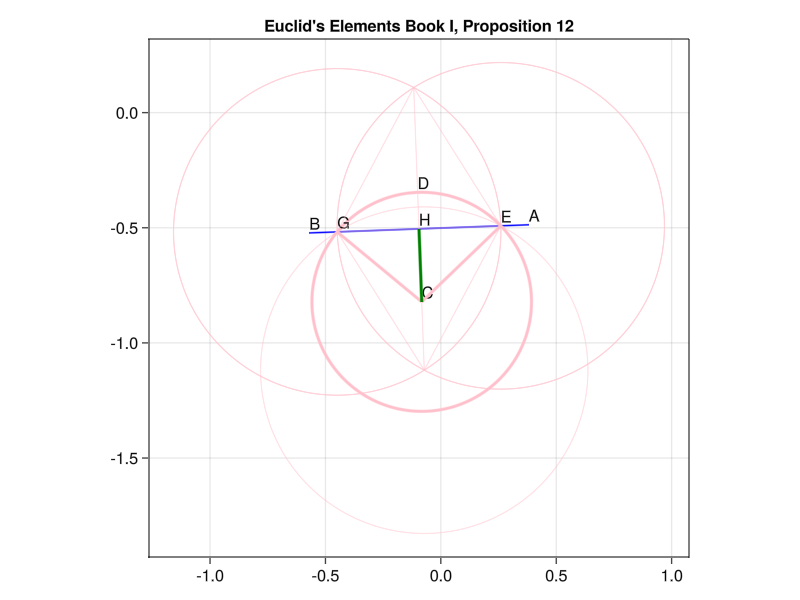

In [4]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 12")

# Let AB be the given infinite straight line, 
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
# and C the given point which is not on it on it;
#       ASIDE : We choose one using a rotation that is kinda obvious for the solution but eh
AB_norm = norm(B-A)
AB_u = (B-A)/AB_norm
θ_AB = vector_angle(A,B)
AB_mid = A + [cos(θ_AB); sin(θ_AB)]*(AB_norm/2)
AB_mid_C_θ = π/2
C = Point2f0([cos(AB_mid_C_θ) -sin(AB_mid_C_θ); sin(AB_mid_C_θ) cos(AB_mid_C_θ)]*AB_u*(AB_norm/3) + AB_mid)

lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")


# thus it is required to draw to the given infinite straight line AB, from the given point C
#   which is not on it, a perpendicular straight line.

# For let a point D be taken at random on the other side of the straight line AB,
#       ASIDE: We just continue a line from C to the midpoint of AB and drop a lil further
D = continue_line(C, AB_mid, norm(AB_mid - C) / 2)
text!(D, text="D")

# and with centre C and distance CD let the circle EFG be described; [Post. 3]
CD_norm = norm(D-C)
EFG = whole_circle(C, CD_norm, vector_angle(C, D), color=:pink, linewidth=3f0, cursorwidth=0.01f0)
fill_circle(EFG)
#       ASIDE: We need to find E and F that intersect the EFG and AB
#               This is done with the quadratic formula acting on the formula of the line and the circle
m = (B[2]-A[2])/(B[1]-A[1])
b = B[2]-m*B[1]
quad_a = m^2 + 1
quad_b = 2*(b*m - C[1] - C[2]*m)
quad_c = C[1]^2 + C[2]^2 - CD_norm^2 + b^2 - 2*b*C[2]
# quad_a * x^2  + quad_b * x + quad_c = 0
E_x = (-quad_b + √(quad_b^2 - 4*quad_a*quad_c)) / (2*quad_a)
G_x = (-quad_b - √(quad_b^2 - 4*quad_a*quad_c)) / (2*quad_a)
E = Point2f0(E_x, m*E_x+b)
G = Point2f0(G_x, m*G_x+b)
text!(E, text="E")
text!(G, text="G")

# let the straight line EG be bisected at H, [I. 10]
H_lines = bisect_line(E, G, color=:pink, linewidth=0.6f0, cursorlw=0.01f0)
fill_bisect_line(H_lines)
H_C, H_F, H = Points(H_lines)
H_bisect = straight_line(H_C, H_F, color=:pink, linewidth=0.6f0, cursorwidth=0.01f0)
fill_line(H_bisect)
text!(H, text="H")

# and let the straight lines CG, CH, CE be joined. [Post. 1]
CG = straight_line(C, G, color=:pink, linewidth=3f0, cursorwidth=0.01f0)
CE = straight_line(C, E, color=:pink, linewidth=3f0, cursorwidth=0.01f0)
CH = straight_line(C, H, color=:green, linewidth=3f0, cursorwidth=0.01f0)
fill_line(CG)
fill_line(CE)
fill_line(CH)

# I say that CH has been drawn perpendicular to the given infinite straight line AB
# from the given point C which is not on it.

# For, since GH is equal to HE, and HC is common,
#   the two sides GH, HC are equal to the two sides EH, HC respectively;
# and the base CG is equal to the base CE;
#       therefore the angle CHG is equal to the angle EHC. [I. 8]
# And they are adjacent angles.
# But, when a straight line set up on a straight line makes the adjacent angles
# equal to one another, each of the e3qual angles is right, and the straight line
# standing on the other is called a perpendicular to that on which it stands. [Def. 10]

# Therefore CH has been drawn perpendicular to the given infinite straight line AB
# from the given point C which is not on it.

# QEF

#Draw and show the chart :)
current_figure()

### Animation

In [30]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 12")
xlims!(ax, -1.5,1)
ylims!(ax, -2,0.5)

# Let AB be the given infinite straight line, 
# and C the given point which is not on it on it;
#       ASIDE : due to the complexity of choosing the points on this one, always reusing the above
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")


# thus it is required to draw to the given infinite straight line AB, from the given point C
#   which is not on it, a perpendicular straight line.

# For let a point D be taken at random on the other side of the straight line AB,
D_opac = Observable(0f0)
text!(D, text="D", color=@lift(RGBA(0,0,0,$D_opac)))

# and with centre C and distance CD let the circle EFG be described; [Post. 3]
EFG = whole_circle(C, CD_norm, vector_angle(C, D), color=:pink, linewidth=3f0, cursorwidth=5f0)
E_opac = Observable(0f0)
G_opac = Observable(0f0)
text!(E, text="E", color=@lift(RGBA(0,0,0,$E_opac)))
text!(G, text="G", color=@lift(RGBA(0,0,0,$G_opac)))

# let the straight line EG be bisected at H, [I. 10]
H_lines = bisect_line(E, G, color=:pink, linewidth=3f0, cursorlw=0.01f0)
H_C, H_F, H = Points(H_lines)
H_bisect = straight_line(H_C, H_F, color=:pink, linewidth=3f0, cursorwidth=0.01f0)
H_opac = Observable(0f0)
text!(H, text="H", color=@lift(RGBA(0,0,0,$H_opac)))

# and let the straight lines CG, CH, CE be joined. [Post. 1]
CG = straight_line(C, G, color=:pink, linewidth=3f0, cursorwidth=0.01f0)
CE = straight_line(C, E, color=:pink, linewidth=3f0, cursorwidth=0.01f0)
CH = straight_line(C, H, color=:green, linewidth=3f0, cursorwidth=0.01f0)

# I say that CH has been drawn perpendicular to the given infinite straight line AB
# from the given point C which is not on it.

# For, since GH is equal to HE, and HC is common,
#   the two sides GH, HC are equal to the two sides EH, HC respectively;
# and the base CG is equal to the base CE;
#       therefore the angle CHG is equal to the angle EHC. [I. 8]
# And they are adjacent angles.
# But, when a straight line set up on a straight line makes the adjacent angles
# equal to one another, each of the e3qual angles is right, and the straight line
# standing on the other is called a perpendicular to that on which it stands. [Def. 10]

# Therefore CH has been drawn perpendicular to the given infinite straight line AB
# from the given point C which is not on it.

# QEF

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 5f0π, step=5f0π/(d_s*framerate))

record(f, "gifs/Euclid-I-12.01.gif", timestamps; framerate=framerate) do t
    # animate the point letters
    if t <= 0.5π
        D_opac[] = 0f0
        E_opac[] = 0f0
        G_opac[] = 0f0
        H_opac[] = 0f0
    elseif t > 0.5f0π && t <= 0.75f0π
        D_opac[] = (t-0.5f0π)/0.25f0π
        E_opac[] = 0f0
        G_opac[] = 0f0
        H_opac[] = 0f0
    elseif t > 0.75f0π && t <= 1.25π
        D_opac[] = 1f0
        E_opac[] = 0f0
        G_opac[] = 0f0
        H_opac[] = 0f0
    elseif t > 1.25π && t <= 1.5π
        D_opac[] = 1f0
        E_opac[] = (t-1.25π)/0.25π
        G_opac[] = (t-1.25π)/0.25π
        H_opac[] = 0f0
    elseif t > 1.5π && t <= 2π
        D_opac[] = 1f0
        E_opac[] = 1f0
        G_opac[] = 1f0
        H_opac[] = 0f0
    elseif t > 2.75π && t <= 3π
        D_opac[] = 1f0
        E_opac[] = 1f0
        G_opac[] = 1f0
        H_opac[] = (t-2.75π)/0.25π
    elseif t > 3π
        D_opac[] = 1f0
        E_opac[] = 1f0
        G_opac[] = 1f0
        H_opac[] = 1f0
    end

    # animate the circle EFG
    animate_circle(EFG, 0.75π, 1.25π, t, fade_start=4π, fade_end=4.5π)

    # animate bisecting the line
    animate_bisect_line(H_lines, 1.5π, 2.5π, t, fade_start=3π, fade_end=3.5π)
    animate_line(H_bisect, 2.5π, 2.75π, t, fade_start=3π, fade_end=3.5π)

    # animate drawing CG, CE, CH
    animate_line(CG, 3π, 3.25π, t, fade_start=4π, fade_end=4.5π)
    animate_line(CE, 3π, 3.25π, t, fade_start=4π, fade_end=4.5π)
    animate_line(CH, 3.25π, 3.5π, t)
end;

![animation](gifs/Euclid-I-12.01.gif)

#### Using Reusable Animation Code

In [22]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 12")
xlims!(ax, -1.5,1)
ylims!(ax, -2,0.5)

# Let AB be the given infinite straight line, 
# and C the given point which is not on it on it;
#       ASIDE : due to the complexity of choosing the points on this one, always reusing the above
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")

#Draw the lines and get the endpoints of C, H
CH = perpendicular_to_point(A, B, C, color=:pink, linewidth=3f0, cursorwidth=0.005f0)
H = Point(CH)
H_opac = Observable(0f0)
text!(H, text="H", color=@lift(RGBA(0,1,0,$H_opac)))

# Draw line CH
CH_line = straight_line(C, H, color=:green, linewidth=2f0, cursorwidth=0.005f0)


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 5π, step=5π/(d_s*framerate))

record(f, "gifs/Euclid-I-12.02.gif", timestamps; framerate=framerate) do t
    # animate the perpendicular background
    animate_perpendicular_to_point(CH, 0.5π, 2.25π, t, fade_start=1.5π, fade_end=3f0π)
    if t > 2π && t < 2.25π
        H_opac[] = (t-2π)/0.25π
    elseif t >= 2.25π
        H_opac[] = 1f0
    end

    #Animate CH
    animate_line(CH_line, 2.25f0π, 2.75f0π, t)
end;

![animation](gifs/Euclid-I-12.02.gif)